In [1]:
import tensorflow as tf
import os
from tensorflow import keras
tf.__version__
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [2]:
keras.__version__

'2.4.0'

# Building an Image Classifier Using the Sequential API

In [3]:
# Using keras to load the dataset
# Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# Make validation set and normalization
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
class_names = ["T-shirt","Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-06-14 10:02:46.016064: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 10:02:46.057043: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz
2022-06-14 10:02:46.058040: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fab68620c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-14 10:02:46.058121: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-14 10:02:46.062157: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Getting list of layers
model.layers

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [15]:
model.get_layer('dense_3') is hidden1

True

In [16]:
# All the parameters of a layer can be accessed using
# get_weights(), set_weights()
weights, biases = hidden1.get_weights()
weights

array([[ 0.05301619,  0.06244113,  0.05054692, ...,  0.01764475,
        -0.00577062,  0.07239129],
       [ 0.04589973, -0.02921166, -0.01609978, ...,  0.05711772,
         0.01447737, -0.0386938 ],
       [-0.01166113,  0.00910156,  0.05611062, ...,  0.01090199,
        -0.02315265, -0.07409004],
       ...,
       [-0.02471458,  0.07275097, -0.00864197, ..., -0.07119269,
         0.061675  ,  0.00472841],
       [ 0.03733488, -0.03830429,  0.04277442, ...,  0.01168951,
         0.03712864, -0.03298739],
       [ 0.0346819 , -0.06444225,  0.01942424, ..., -0.01441158,
         0.03039699,  0.03987434]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
#if we ever want to initialize the connction weights to
# different way, we can use kernel_initializer

In [21]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

### Trainig and Evaluating the model

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

2022-06-14 10:02:46.477440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.0205 - accuracy: 0.6774 - val_loss: 0.5276 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5085 - accuracy: 0.8235 - val_loss: 0.4794 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4493 - accuracy: 0.8451 - val_loss: 0.4384 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4214 - accuracy: 0.8534 - val_loss: 0.3987 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4053 - accuracy: 0.8580 - val_loss: 0.3790 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3827 - accuracy: 0.8651 - val_loss: 0.3707 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3688 - accuracy: 0.8703 - val_loss: 0.3647 - val_accuracy

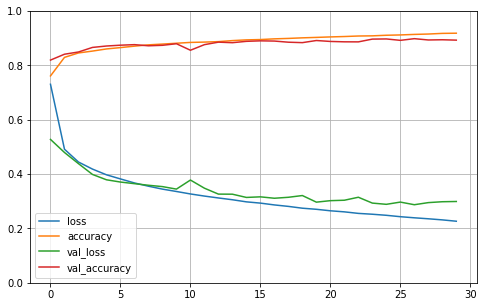

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vetical range to [0-1]
plt.show()

We can see that both training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Also, the validation curves are close to the training curves, which means there is not too much overfitting.

In [24]:
# Eavluating the model using test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 59.7650 - accuracy: 0.8575


[59.76502990722656, 0.8575000166893005]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not on the tes set.

### Using the model to make predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# Class with highest estimated probability
y_pred = model.predict_classes(X_new)
y_pred

/home/vimukthi/anaconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [28]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [30]:
# Here the classifier actually classified all three images correctly
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# This dataset doesn't have any missing values and only numerical values
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit to data
X_valid = scaler.transform(X_valid)     # center the data
X_test = scaler.transform(X_test)

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 2.4126 - val_loss: 3.8773
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 2.6722 - val_loss: 0.8083
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 1.4525 - val_loss: 0.4753
Epoch 4/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4439 - val_loss: 0.4326
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4156 - val_loss: 0.4204
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4012 - val_loss: 0.3994
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4023 - val_loss: 0.3884
Epoch 8/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3944 - val_loss: 0.3851
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.3749
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3618 - val_loss: 0.3722

In [42]:
y_pred

array([[3.3539824],
       [1.8712554],
       [3.1655774]], dtype=float32)

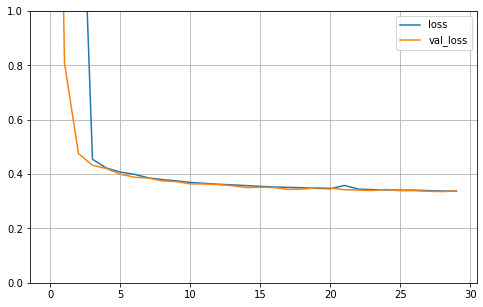

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vetical range to [0-1]
plt.show()

# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a **Wide Deep Neural Networks**. It connects all or part of the inputs directly to the output layer, allowing this architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers.

In [56]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

opt = keras.optimizers.Adam(learning_rate=0.01) # Adam optimizer

model.compile(loss="mean_squared_error", optimizer=opt)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.0053 - val_loss: 0.4268
Epoch 2/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4353 - val_loss: 0.3977
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3796 - val_loss: 0.4000
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3892 - val_loss: 0.5862
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4082 - val_loss: 2.2809
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4225 - val_loss: 4.4302
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 8.1226 - val_loss: 0.3618
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3657 - val_loss: 0.3343
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3401 - val_loss: 0.4029
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4229 - val_loss: 0.3607

In [57]:
y_pred

array([[4.103453],
       [2.129798],
       [3.442926]], dtype=float32)

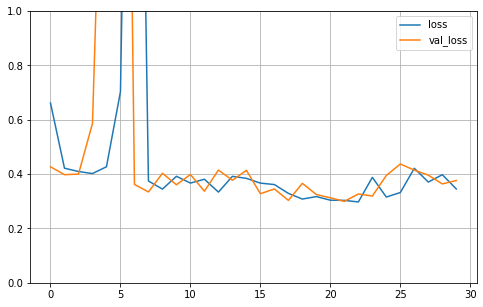

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim (0, 1) # set the vertical range(0, 1)
plt.show()

When we want to send a subset of the features through the wide path and a different subset through the deep path. One solution is to use multiple inputs.

In [62]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [68]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.5810 - main_output_loss: 1.3871 - aux_output_loss: 3.3262 - val_loss: 1.7986 - val_main_output_loss: 1.8366 - val_aux_output_loss: 1.4565
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7483 - main_output_loss: 0.6829 - aux_output_loss: 1.3366 - val_loss: 0.6254 - val_main_output_loss: 0.5491 - val_aux_output_loss: 1.3117
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6013 - main_output_loss: 0.5277 - aux_output_loss: 1.2639 - val_loss: 0.5306 - val_main_output_loss: 0.4681 - val_aux_output_loss: 1.0931
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5404 - main_output_loss: 0.4775 - aux_output_loss: 1.1068 - val_loss: 0.5289 - val_main_output_loss: 0.4824 - val_aux_output_loss: 0.9479
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5104 - main_output_loss: 0.4608 - aux_output_loss: 0.9563 - val_loss

In [69]:
y_pred

[array([[3.0479825],
        [1.8463501],
        [3.161716 ]], dtype=float32),
 array([[3.0961056],
        [1.7075285],
        [2.8827615]], dtype=float32)]

In [64]:
# Handling multiple outputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
# Each output will need its own loss function
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [70]:
# When we train the model, we need to provide labels for each output.
history = model.fit(
            [X_train_A, X_train_B], [y_train, y_train], epochs=20,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 0.3745 - main_output_loss: 0.3611 - aux_output_loss: 0.4952 - val_loss: 0.3599 - val_main_output_loss: 0.3472 - val_aux_output_loss: 0.4743
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3742 - main_output_loss: 0.3615 - aux_output_loss: 0.4889 - val_loss: 0.3643 - val_main_output_loss: 0.3524 - val_aux_output_loss: 0.4712
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3789 - main_output_loss: 0.3672 - aux_output_loss: 0.4844 - val_loss: 0.3702 - val_main_output_loss: 0.3589 - val_aux_output_loss: 0.4723
Epoch 4/20
363/363 [==============================] - 4s 10ms/step - loss: 0.3755 - main_output_loss: 0.3640 - aux_output_loss: 0.4790 - val_loss: 0.3874 - val_main_output_loss: 0.3778 - val_aux_output_loss: 0.4737
Epoch 5/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3850 - main_output_loss: 0.3751 - aux_output_loss: 0.4740 - val_los

In [72]:
# keras provides some useful info
total_loss, main_loss, aux_loss = model.evaluate(
                                        [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.3271 - main_output_loss: 0.3171 - aux_output_loss: 0.4173


In [75]:
# predict() returns predictoins for each output
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main)
print(y_pred_aux)

[[3.2213407]
 [1.8097172]
 [2.9004574]]
[[3.322624 ]
 [1.6937568]
 [2.6837652]]


# Using the Subclassing API to Build Dynamic Models

Both the Sequential API and the Functional API are declarative: start with declaring which layers we want and how they should be connected, and only then data is fed for training or inference. Hence the model is static.

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For that case, Subclass API can be used.

In [78]:
# Creating the model
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

# Saving and Restoring a Model

In [79]:
# model = keras.models.Sequential([...])
# model.compile([....])
# model.fit([....])
# model.save("my_keras_model.h5")

### Loading a model 
# model = keras.models.load_model("my_keras_model.h5")

# Using callbacks

callbacks can be used to save the checkpoints of the training process.

In [ ]:
# .... build and compile the model
checkpint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

The ModelCheckpoint callback saves checkpoints of the model at regular intervals during training, by default at the end of each epoch.

If we use a validation set during training, we can use **save_best_only=True** when creating ModelCheckpoint. It will only save the model when its performance on the validation set is the best so far.

In [83]:
# A simple way to implement early stopping
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
# model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Another way to implement early stopping is to use the **EarlyStopping** callback. It will interrupt training when it measures no progress on the validation set for a number of epochs(defined by patient argument), and it will optionally roll back to the best model.

In [85]:
### Combining both checkpoints and early stopping
#early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

In [88]:
# Creating custom callbacks
# shows the ratio between the validation loss and training loss during training -> detects overfitting
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
# There're much more,
# on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(),
# on_batch_begin(), on_batch_end()

# For evaluation
# on_test_begin(), on_test_end(), on_test_batch_begin(), on_test_batch_end()

# For prediction
# on_predict_begin(), on_predict_end(), on_predict_batch_begin(), on_predict_batch_end()

# Using TensorBoard for Visualization

In [89]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m%_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # /my_logs/run_2019_06_07-15_15_22

In [90]:
# .. Build and compile the model
#tensorboard_db = keras.callbacks.TensorBoard(run_logdir)
#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

This will create the log directory and during training it will create event files and write summaries to them.

Next we need to start the TensorBoard server.
- tensorboard --logdir=./my_logs --port=6006

Runnig in jupyter-notebook
- %load_ext tensorboard
- %tensorboard --logdir=./my_logs --port=6006

# Fine-Tuning Neural Network Hyperparameters

In [94]:
# One option is to simply try many combinations of hyperparameters and
# see which one works best on the validation set (k-fold-cross validation)

# We can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space
# to do this, we need to wrap Keras models into objects that mimic regular Scikit-Learn regressors.

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [95]:
# Create a regressor based on this build_model()
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [96]:
# Now we can use this object like a regular Scikit-Learn regressor
# train using fit(), evaluate using score(), make predictions using predict()

keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.8709 - val_loss: 1.7813
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 1.2376 - val_loss: 0.7150
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6596 - val_loss: 0.6114
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5622
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5734 - val_loss: 0.5313
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5337 - val_loss: 0.5077
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4883 - val_loss: 0.4900
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4768 - val_loss: 0.4760
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4981 - val_loss: 0.4666
Epoch 10/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4536 - val_lo

363/363 [==============================] - 1s 4ms/step - loss: 0.3705 - val_loss: 0.3621
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3570 - val_loss: 0.3594
Epoch 83/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3760 - val_loss: 0.3597
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3520 - val_loss: 0.3613
Epoch 85/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3694 - val_loss: 0.3595
Epoch 86/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3834 - val_loss: 0.3589
Epoch 87/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3633 - val_loss: 0.3597
Epoch 88/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3616 - val_loss: 0.3583
Epoch 89/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - val_loss: 0.3582
Epoch 90/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3684 - val_loss: 

In [97]:
mse_test

-0.3331020176410675

In [98]:
y_pred

array([3.082893 , 1.4294224, 3.201467 ], dtype=float32)

In [101]:
# Randomized search for hyperparameter search space

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 2s 5ms/step - loss: 1.2301 - val_loss: 0.7818
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8159 - val_loss: 0.9270
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [===============

Epoch 35/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4371 - val_loss: 0.4277
Epoch 36/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4272 - val_loss: 0.4297
Epoch 37/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4333 - val_loss: 0.4237
Epoch 38/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4219 - val_loss: 0.4239
Epoch 39/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4019 - val_loss: 0.4205
Epoch 40/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3963 - val_loss: 0.4186
Epoch 41/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4094 - val_loss: 0.4166
Epoch 42/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4122 - val_loss: 0.4159
Epoch 43/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3939 - val_loss: 0.4134
Epoch 44/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4105

242/242 [==============================] - 1s 5ms/step - loss: 0.4698 - val_loss: 0.5995
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4745 - val_loss: 0.5849
Epoch 16/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4679 - val_loss: 0.5691
Epoch 17/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4879 - val_loss: 0.5555
Epoch 18/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4839 - val_loss: 0.5449
Epoch 19/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4835 - val_loss: 0.5364
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4519 - val_loss: 0.5253
Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4311 - val_loss: 0.5161
Epoch 22/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4510 - val_loss: 0.5083
Epoch 23/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4528 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3583 - val_loss: 0.3644
Epoch 95/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3665 - val_loss: 0.3630
Epoch 96/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3484 - val_loss: 0.3639
Epoch 97/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3701 - val_loss: 0.3645
Epoch 98/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3690 - val_loss: 0.3623
Epoch 99/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3658 - val_loss: 0.3621
Epoch 100/100
121/121 [==============================] - 0s 3ms/step - loss: 0.3637
Epoch 1/100
242/242 [==============================] - 2s 7ms/step - loss: 3.0186 - val_loss: 0.9546
Epoch 2/100
242/242 [==============================] - 2s 6ms/step - loss: 0.8298 - val_loss: 0.7781
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.8117 - val_loss: 0.7221
Epoch 4/100
24

Epoch 74/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3643 - val_loss: 0.3766
Epoch 75/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3796 - val_loss: 0.3742
Epoch 76/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3767 - val_loss: 0.3747
Epoch 77/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3787 - val_loss: 0.3750
Epoch 78/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3606 - val_loss: 0.3731
Epoch 79/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3797 - val_loss: 0.3733
Epoch 80/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3869 - val_loss: 0.3741
Epoch 81/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3750 - val_loss: 0.3714
Epoch 82/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3725 - val_loss: 0.3758
Epoch 83/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3959

242/242 [==============================] - 1s 5ms/step - loss: 0.3076 - val_loss: 0.3545
Epoch 54/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3042 - val_loss: 0.3199
Epoch 55/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3202 - val_loss: 0.3226
Epoch 56/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3011 - val_loss: 0.3169
Epoch 57/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3097 - val_loss: 0.3276
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2862 - val_loss: 0.3368
Epoch 59/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2818 - val_loss: 0.3171
Epoch 60/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2896 - val_loss: 0.3156
Epoch 61/100
242/242 [==============================] - 1s 5ms/step - loss: 0.2983 - val_loss: 0.3240
Epoch 62/100
242/242 [==============================] - 1s 5ms/step - loss: 0.2945 - val_loss: 

Epoch 43/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3194 - val_loss: 0.3359
Epoch 44/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3384 - val_loss: 0.3424
Epoch 45/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3433 - val_loss: 0.3450
Epoch 46/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3508 - val_loss: 0.3481
Epoch 47/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3356 - val_loss: 0.3454
Epoch 48/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3317 - val_loss: 0.3458
Epoch 49/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3189 - val_loss: 0.3553
Epoch 50/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3208 - val_loss: 0.3568
Epoch 51/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3154 - val_loss: 0.3513
Epoch 52/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3311

242/242 [==============================] - 2s 7ms/step - loss: 0.3065 - val_loss: 0.3337
Epoch 70/100
242/242 [==============================] - 1s 5ms/step - loss: 0.2809 - val_loss: 0.3219
Epoch 71/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3078 - val_loss: 0.3285
Epoch 72/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3098 - val_loss: 0.3154
Epoch 73/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3103 - val_loss: 0.3180
Epoch 74/100
242/242 [==============================] - 1s 5ms/step - loss: 0.2981 - val_loss: 0.3211
Epoch 75/100
242/242 [==============================] - 1s 5ms/step - loss: 0.2931 - val_loss: 0.3223
Epoch 76/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3153 - val_loss: 0.3220
Epoch 77/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3103 - val_loss: 0.3166
Epoch 78/100
242/242 [==============================] - 1s 6ms/step - loss: 0.2969 - val_loss: 

Epoch 49/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5248 - val_loss: 0.5407
Epoch 50/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4970 - val_loss: 0.5413
Epoch 51/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5227 - val_loss: 0.5405
Epoch 52/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5194 - val_loss: 0.5411
Epoch 53/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5349 - val_loss: 0.5408
Epoch 54/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5402 - val_loss: 0.5398
Epoch 55/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5468 - val_loss: 0.5406
Epoch 56/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5229 - val_loss: 0.5396
Epoch 57/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5260 - val_loss: 0.5390
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5601

242/242 [==============================] - 1s 4ms/step - loss: 0.5581 - val_loss: 0.5549
Epoch 29/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5347 - val_loss: 0.5566
Epoch 30/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5388 - val_loss: 0.5579
Epoch 31/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5628 - val_loss: 0.5589
Epoch 32/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5405 - val_loss: 0.5608
Epoch 33/100
121/121 [==============================] - 0s 3ms/step - loss: 0.5545
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 5.9245 - val_loss: 2.9821
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 2.4560 - val_loss: 1.6328
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3896 - val_loss: 1.0908
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9953 - val_loss: 0.8599
Epoch 5/100
242/

Epoch 75/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5369 - val_loss: 0.5335
Epoch 76/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5349 - val_loss: 0.5333
Epoch 77/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5342 - val_loss: 0.5333
Epoch 78/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5501 - val_loss: 0.5331
Epoch 79/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5424 - val_loss: 0.5329
Epoch 80/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5317 - val_loss: 0.5328
Epoch 81/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5473 - val_loss: 0.5327
Epoch 82/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5357 - val_loss: 0.5327
Epoch 83/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5217 - val_loss: 0.5326
Epoch 84/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5406

242/242 [==============================] - 2s 7ms/step - loss: 0.3634 - val_loss: 0.3783
Epoch 17/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3723 - val_loss: 0.3747
Epoch 18/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3625 - val_loss: 0.3720
Epoch 19/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3435 - val_loss: 0.3771
Epoch 20/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3596 - val_loss: 0.3657
Epoch 21/100
242/242 [==============================] - 2s 6ms/step - loss: 0.3441 - val_loss: 0.3706
Epoch 22/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3258 - val_loss: 0.3567
Epoch 23/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3448 - val_loss: 0.3552
Epoch 24/100
242/242 [==============================] - 2s 9ms/step - loss: 0.3381 - val_loss: 0.3552
Epoch 25/100
242/242 [==============================] - 2s 9ms/step - loss: 0.3297 - val_loss: 

242/242 [==============================] - 2s 7ms/step - loss: 0.3660 - val_loss: 0.3719
Epoch 22/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3700 - val_loss: 0.3737
Epoch 23/100
242/242 [==============================] - 2s 6ms/step - loss: 0.3446 - val_loss: 0.3732
Epoch 24/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3561 - val_loss: 0.3673
Epoch 25/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3453 - val_loss: 0.3769
Epoch 26/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3428 - val_loss: 0.3760
Epoch 27/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3495 - val_loss: 0.3726
Epoch 28/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3247 - val_loss: 0.3855
Epoch 29/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3539 - val_loss: 0.3906
Epoch 30/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3622 - val_loss: 

Epoch 67/100
242/242 [==============================] - 2s 7ms/step - loss: 0.2850 - val_loss: 0.3073
Epoch 68/100
242/242 [==============================] - 1s 6ms/step - loss: 0.2883 - val_loss: 0.3026
Epoch 69/100
242/242 [==============================] - 2s 6ms/step - loss: 0.2767 - val_loss: 0.3070
Epoch 70/100
242/242 [==============================] - 2s 7ms/step - loss: 0.2994 - val_loss: 0.3176
Epoch 71/100
242/242 [==============================] - 2s 7ms/step - loss: 0.2926 - val_loss: 0.3054
Epoch 72/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3008 - val_loss: 0.3252
Epoch 73/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3132 - val_loss: 0.3012
Epoch 74/100
242/242 [==============================] - 2s 7ms/step - loss: 0.2789 - val_loss: 0.3106
Epoch 75/100
242/242 [==============================] - 2s 7ms/step - loss: 0.2866 - val_loss: 0.3060
Epoch 76/100
242/242 [==============================] - 2s 8ms/step - loss: 0.2976

242/242 [==============================] - 2s 7ms/step - loss: 0.3979 - val_loss: 0.3992
Epoch 54/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4058 - val_loss: 0.4007
Epoch 55/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4032 - val_loss: 0.4001
Epoch 56/100
242/242 [==============================] - 2s 6ms/step - loss: 0.3927 - val_loss: 0.3972
Epoch 57/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3966 - val_loss: 0.3960
Epoch 58/100
242/242 [==============================] - 2s 9ms/step - loss: 0.4112 - val_loss: 0.3959
Epoch 59/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3854 - val_loss: 0.3938
Epoch 60/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3857 - val_loss: 0.3919
Epoch 61/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3770 - val_loss: 0.3934
Epoch 62/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3698 - val_loss: 

242/242 [==============================] - 1s 5ms/step - loss: 0.4884 - val_loss: 0.4743
Epoch 12/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4786 - val_loss: 0.4667
Epoch 13/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4522 - val_loss: 0.4618
Epoch 14/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4506 - val_loss: 0.4556
Epoch 15/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4321 - val_loss: 0.4528
Epoch 16/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4541 - val_loss: 0.4481
Epoch 17/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4519 - val_loss: 0.4453
Epoch 18/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4607 - val_loss: 0.4415
Epoch 19/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4408 - val_loss: 0.4396
Epoch 20/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4383 - val_loss: 

242/242 [==============================] - 2s 8ms/step - loss: 0.3573 - val_loss: 0.3583
Epoch 92/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3535 - val_loss: 0.3564
Epoch 93/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3669 - val_loss: 0.3602
Epoch 94/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3590 - val_loss: 0.3580
Epoch 95/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3599 - val_loss: 0.3588
Epoch 96/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3495 - val_loss: 0.3561
Epoch 97/100
242/242 [==============================] - 3s 11ms/step - loss: 0.3507 - val_loss: 0.3569
Epoch 98/100
242/242 [==============================] - 2s 10ms/step - loss: 0.3537 - val_loss: 0.3534
Epoch 99/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3535 - val_loss: 0.3538
Epoch 100/100
121/121 [==============================] - 1s 4ms/step - loss: 0.3708
Epoch 1/1

Epoch 71/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4217 - val_loss: 0.4345
Epoch 72/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4190 - val_loss: 0.4341
Epoch 73/100
242/242 [==============================] - 2s 9ms/step - loss: 0.4257 - val_loss: 0.4336
Epoch 74/100
242/242 [==============================] - 2s 8ms/step - loss: 0.3903 - val_loss: 0.4300
Epoch 75/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4047 - val_loss: 0.4317
Epoch 76/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4079 - val_loss: 0.4303
Epoch 77/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4051 - val_loss: 0.4287
Epoch 78/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4065 - val_loss: 0.4273
Epoch 79/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4055 - val_loss: 0.4280
Epoch 80/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4315

242/242 [==============================] - 2s 7ms/step - loss: 0.5007 - val_loss: 0.4851
Epoch 51/100
242/242 [==============================] - 3s 11ms/step - loss: 0.4858 - val_loss: 0.4818
Epoch 52/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4490 - val_loss: 0.4784
Epoch 53/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4776 - val_loss: 0.4754
Epoch 54/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4492 - val_loss: 0.4731
Epoch 55/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4588 - val_loss: 0.4697
Epoch 56/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4474 - val_loss: 0.4670
Epoch 57/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5004 - val_loss: 0.4652
Epoch 58/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4543 - val_loss: 0.4621
Epoch 59/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4355 - val_loss:

Epoch 30/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4892 - val_loss: 0.5050
Epoch 31/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5123 - val_loss: 0.4992
Epoch 32/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4863 - val_loss: 0.4943
Epoch 33/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5085 - val_loss: 0.4903
Epoch 34/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5054 - val_loss: 0.4858
Epoch 35/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4728 - val_loss: 0.4813
Epoch 36/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4532 - val_loss: 0.4767
Epoch 37/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4609 - val_loss: 0.4730
Epoch 38/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4839 - val_loss: 0.4707
Epoch 39/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4782

Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 4038941556937193.0000 - val_loss: 651166313938419712.0000
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 920664301966266880.0000 - val_loss: 79744332604268085248.0000
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 175662041448470020096.0000
Epoch 1/100
242/242 [==============================] - 2s 5ms/step - loss: 1.7534 - val_loss: 0.6710
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6185 - val_loss: 0.6400
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6099 - val_loss: 0.7219
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.6181 - val_loss: 0.8112
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5245 - val_loss: 0.9126
Epoch 6/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5684 - val_loss: 1.0039
Epoch 7/100
242/242 

Epoch 50/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4933 - val_loss: 0.5063
Epoch 51/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4876 - val_loss: 0.5036
Epoch 52/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5034 - val_loss: 0.5042
Epoch 53/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4823 - val_loss: 0.5014
Epoch 54/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4952 - val_loss: 0.5007
Epoch 55/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5188 - val_loss: 0.4981
Epoch 56/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4896 - val_loss: 0.4953
Epoch 57/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4760 - val_loss: 0.4941
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4902 - val_loss: 0.4934
Epoch 59/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4538

242/242 [==============================] - 2s 6ms/step - loss: 0.5703 - val_loss: 0.5648
Epoch 30/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5522 - val_loss: 0.5600
Epoch 31/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5380 - val_loss: 0.5565
Epoch 32/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5832 - val_loss: 0.5525
Epoch 33/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5275 - val_loss: 0.5488
Epoch 34/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5635 - val_loss: 0.5457
Epoch 35/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5499 - val_loss: 0.5430
Epoch 36/100
242/242 [==============================] - 2s 6ms/step - loss: 0.5417 - val_loss: 0.5395
Epoch 37/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5568 - val_loss: 0.5369
Epoch 38/100
242/242 [==============================] - 2s 8ms/step - loss: 0.5494 - val_loss: 

Epoch 9/100
242/242 [==============================] - 2s 8ms/step - loss: 0.7237 - val_loss: 0.7446
Epoch 10/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6977 - val_loss: 0.7307
Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7045 - val_loss: 0.7181
Epoch 12/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6856 - val_loss: 0.7068
Epoch 13/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6597 - val_loss: 0.6963
Epoch 14/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6796 - val_loss: 0.6872
Epoch 15/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6757 - val_loss: 0.6788
Epoch 16/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6637 - val_loss: 0.6702
Epoch 17/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6137 - val_loss: 0.6619
Epoch 18/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6192 

242/242 [==============================] - 1s 5ms/step - loss: 0.4463 - val_loss: 0.4523
Epoch 90/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4518 - val_loss: 0.4513
Epoch 91/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4471 - val_loss: 0.4512
Epoch 92/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4457 - val_loss: 0.4507
Epoch 93/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4496 - val_loss: 0.4491
Epoch 94/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4426 - val_loss: 0.4484
Epoch 95/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4461 - val_loss: 0.4481
Epoch 96/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4161 - val_loss: 0.4469
Epoch 97/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4393 - val_loss: 0.4459
Epoch 98/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4385 - val_loss: 

/home/vimukthi/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [            nan -3.74021381e-01 -3.59915038e-01 -5.53867141e-01
 -6.96282462e+15 -3.96989028e-01 -4.39103107e-01 -4.20989424e-01
 -8.77179352e+19 -4.74463075e-01]
  warnings.warn(


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f955b41b610>, as the constructor either does not set or modifies parameter learning_rate

In [102]:
rnd_search_cv.best_params_

{'learning_rate': 0.005520512430789476, 'n_hidden': 3, 'n_neurons': 29}

In [104]:
rnd_search_cv.best_score_

-0.35991503794987995